In [1]:
# 1. Inspect the Dataset Structure
# Purpose: Understand the dataset’s size, column types, and initial missing values.

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSVs
df = pd.read_csv("owid_climate_data.csv")

# Display basic info
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                26182 non-null  object 
 1   Country Code                22895 non-null  object 
 2   Year                        26182 non-null  int64  
 3   CO2 Emissions Per Capita    26182 non-null  float64
 4   Annual Temperature Anomaly  14319 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1022.9+ KB
None

First 5 rows:
  Country Name Country Code  Year  CO2 Emissions Per Capita  \
0  Afghanistan          AFG  1949                  0.001992   
1  Afghanistan          AFG  1950                  0.010837   
2  Afghanistan          AFG  1951                  0.011625   
3  Afghanistan          AFG  1952                  0.011468   
4  Afghanistan          AFG  1953                  0.013123   

   Annual Temperature Anomaly

In [2]:
# 2. Check for Missing Values
# Purpose: Identify and quantify missing data in each column.

# Count missing values per column
print("Missing values per column:")
print(df.isnull().sum())
# Percentage of missing values
print("\nPercentage missing:")
print(df.isnull().mean() * 100)

Missing values per column:
Country Name                      0
Country Code                   3287
Year                              0
CO2 Emissions Per Capita          0
Annual Temperature Anomaly    11863
dtype: int64

Percentage missing:
Country Name                   0.000000
Country Code                  12.554427
Year                           0.000000
CO2 Emissions Per Capita       0.000000
Annual Temperature Anomaly    45.309755
dtype: float64


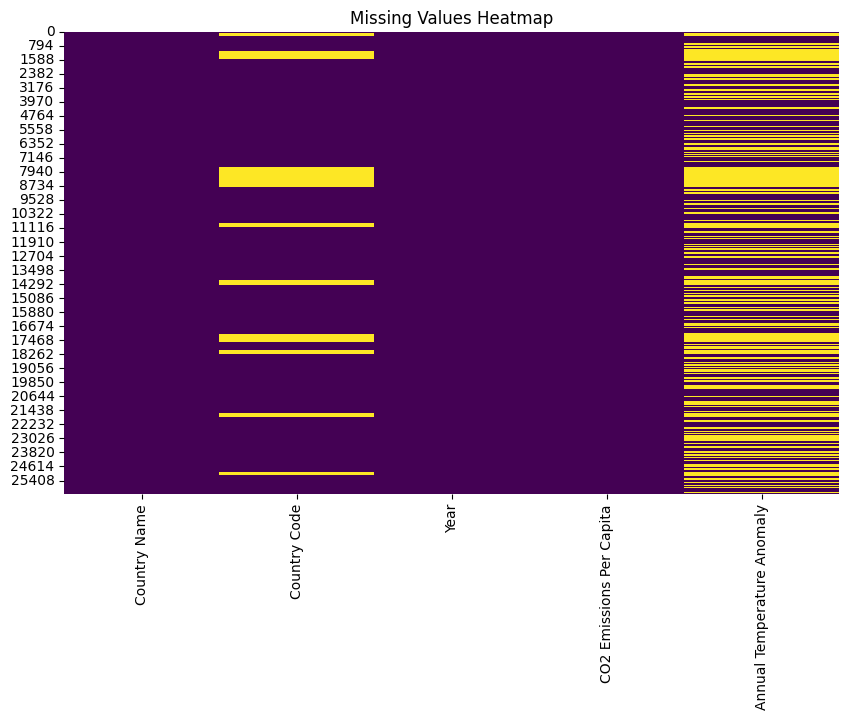

In [3]:
# 3. Visualize Missing Values
# Purpose: Graphically explore missing data patterns.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
# 6. Validate year Values
# Purpose: Ensure year contains reasonable values.

# Check range of years
print("Year range:", df['year'].min(), "to", df['year'].max())
# Check for invalid years (e.g., negative or future years)
invalid_years = df[~df['year'].between(1800, 2025)]['year'].unique()
print("Invalid years:", invalid_years)

KeyError: 'year'

In [15]:
# 7. Check for Zero Values in co2_emissions and temperature
# Purpose: Identify zero values, which may indicate missing data or errors.

# Count zero values
print("Zero CO2 emissions:", (df['co2'] == 0).sum())
print("Zero temperature:", (df['temperature'] == 0).sum())
# Inspect rows with zero CO2
print("\nRows with zero CO2:")
print(df[df['co2'] == 0][['country', 'year', 'co2']])

KeyError: 'co2'

In [16]:
# 9. Detect Outliers in Numerical Columns
# Purpose: Identify extreme values in co2_emissions and temperature using the IQR method.

# Function to detect outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply to CO2 and temperature
co2_outliers = find_outliers(df, 'co2')
temp_outliers = find_outliers(df, 'temperature')
print("CO2 outliers:", co2_outliers[['country', 'year', 'co2']])
print("Temperature outliers:", temp_outliers[['country', 'year', 'temperature']])

KeyError: 'co2'

In [17]:
# 11. Check for Duplicates
# Purpose: Identify duplicate rows or country-year combinations.

# Check for exact duplicates
print("Duplicate rows:", df.duplicated().sum())
# Check for duplicate country-year pairs
print("Duplicate country-year pairs:", df.duplicated(subset=['country', 'year']).sum())
# Inspect duplicates
print("\nDuplicate country-year pairs:")
print(df[df.duplicated(subset=['country', 'year'], keep=False)][['country', 'year']])

Duplicate rows: 0


KeyError: Index(['country', 'year'], dtype='object')

In [5]:
# 12. Validate Data Types
# Purpose: Ensure columns have correct data types.

# Check current data types
print("Data types:\n", df.dtypes)

# Convert if needed (example) - DO NOT USE. NOT REQUIRED SINCE ALL DATA IS CORRECT TYPE FOR EACH COLUMN.
# df['year'] = df['year'].astype(int)
# df['country'] = df['country'].astype(str)
# df['co2'] = df['co2'].astype(float)
# df['temperature'] = df['temperature'].astype(float)
# print("\nUpdated data types:\n", df.dtypes)

Data types:
 Country Name                   object
Country Code                   object
Year                            int64
CO2 Emissions Per Capita      float64
Annual Temperature Anomaly    float64
dtype: object
